In [35]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [3]:
df= pd.read_csv('ClusterVisualization.csv')

In [4]:
print(list(df.columns))

['Unnamed: 0.1', 'Unnamed: 0', 'book_id', 'author_id', 'authors', 'title', 'description', 'publisher', 'genres', 'avg_rating', 'ratings_count', 'num_pages', 'pub_year', 'similar_books', 'url', 'tokens', 'f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47', 'f_48', 'f_49', 'f_50', 'f_51', 'f_52', 'f_53', 'f_54', 'f_55', 'f_56', 'f_57', 'f_58', 'f_59', 'f_60', 'f_61', 'f_62', 'f_63', 'f_64', 'f_65', 'f_66', 'f_67', 'f_68', 'f_69', 'f_70', 'f_71', 'f_72', 'f_73', 'f_74', 'f_75', 'f_76', 'f_77', 'f_78', 'f_79', 'f_80', 'f_81', 'f_82', 'f_83', 'f_84', 'f_85', 'f_86', 'f_87', 'f_88', 'f_89', 'f_90', 'f_91', 'f_92', 'f_93', 'f_94', 'f_95', 'f_96', 'f_97', 'f_98', 'f_99', 'kmeans

In [13]:
df = df.drop(columns = ['Unnamed: 0.1','Unnamed: 0'])

In [29]:
df = df.drop(columns = ['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47', 'f_48', 'f_49', 'f_50', 'f_51', 'f_52', 'f_53', 'f_54', 'f_55', 'f_56', 'f_57', 'f_58', 'f_59', 'f_60', 'f_61', 'f_62', 'f_63', 'f_64', 'f_65', 'f_66', 'f_67', 'f_68', 'f_69', 'f_70', 'f_71', 'f_72', 'f_73', 'f_74', 'f_75', 'f_76', 'f_77', 'f_78', 'f_79', 'f_80', 'f_81', 'f_82', 'f_83', 'f_84', 'f_85', 'f_86', 'f_87', 'f_88', 'f_89', 'f_90', 'f_91', 'f_92', 'f_93', 'f_94', 'f_95', 'f_96', 'f_97', 'f_98', 'f_99'])

In [30]:
df.head(5)

,book_id,author_id,authors,title,description,publisher,genres,avg_rating,ratings_count,num_pages,pub_year,similar_books,url,tokens,kmeans_cluster,tsne_1,tsne_2
0,2767052,153394,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",Winning will make you famous.\nLosing means ce...,Scholastic Press,"['favorites', 'currently-reading', 'to-read', ...",4.34,4899965,374,2008.0,"['1902241', '146499', '954674', '9917938', '10...",https://www.goodreads.com/book/show/2767052-th...,winning make famous losing means certain death...,1,-3.141719,-22.371456
1,3,1077326,J.K. Rowling,Harry Potter and the Sorcerer's Stone (Harry P...,Harry Potter's life is miserable. His parents ...,Scholastic Inc,"['to-read', 'favorites', 'fantasy', 'young-adu...",4.45,4765497,320,1997.0,"['13830', '127586', '121822', '37586', '616435...",https://www.goodreads.com/book/show/3.Harry_Po...,harry potter life miserable parents dead stuck...,6,-26.270016,39.990067
2,2657,1825,Harper Lee,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,Harper Perennial Modern Classics,"['to-read', 'favorites', 'classics', 'classic'...",4.26,3255518,324,2006.0,"['1934', '2156', '15638', '53835', '77142', '5...",https://www.goodreads.com/book/show/2657.To_Ki...,unforgettable novel childhood sleepy southern ...,9,-73.710020,18.741083
3,4671,3190,F. Scott Fitzgerald,The Great Gatsby,"THE GREAT GATSBY, F. Scott Fitzgerald's third ...",Scribner,"['to-read', 'classics', 'favorites', 'fiction'...",3.89,2758812,180,2004.0,"['48203', '337113', '176972', '188087', '10956...",https://www.goodreads.com/book/show/4671.The_G...,great gatsby scott fitzgerald third book stand...,9,-69.853080,13.803644
4,11870085,1406384,John Green,The Fault in Our Stars,"There is an alternate cover edition .\n""I fel...",Dutton Books,"['to-read', 'favorites', 'young-adult', 'ficti...",4.26,2429317,313,2012.0,"['10051706', '11418182', '10327303', '9627755'...",https://www.goodreads.com/book/show/11870085-t...,"alternate cover edition ""i fell love way fall ...",6,-29.746130,60.351948


## Exploratory Data Analysis

In [31]:
df.columns

Index(['book_id', 'author_id', 'authors', 'title', 'description', 'publisher',
       'genres', 'avg_rating', 'ratings_count', 'num_pages', 'pub_year',
       'similar_books', 'url', 'tokens', 'kmeans_cluster', 'tsne_1', 'tsne_2'],
      dtype='object')

**Columns Description**

book_id: Contains the unique ID for each book

author_id: contains the id(s) for author(s) of the particular book

authors: contains the author of the particular book

title: contains the titles of the books

description: contains a short decription of each book

publisher: contains the publisher of the particular book

genres: contains genres of the particular book given by the users

avg_ratings:the average rating of the books, as decided by the users

rating_count: Contains the number of ratings given for the book

num_pages:Contains the number of pages for the book

pub_year: contain the year the book was published

simillar_books:

url: contains the Goodread link to a specific book.

tokens: The text in the descriotion column is parsed and transform into a list of words usingNatural Language Toolkit (NLTK) and Regular Expressions (RegEx) 

Kmeans_cluster:Using Cluster Analysis, the similar books is grouped togther.

tsne_1: Using t-Distributed Stochastic Neighbor Embedding (t-SNE), we map a high-dimensional distribution into a 2-dim plane.

tsne_2: Using t-Distributed Stochastic Neighbor Embedding (t-SNE), we map a high-dimensional distribution into a 2-dim plane.


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19907 entries, 0 to 19906
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_id         19907 non-null  int64  
 1   author_id       19907 non-null  int64  
 2   authors         19907 non-null  object 
 3   title           19907 non-null  object 
 4   description     19907 non-null  object 
 5   publisher       19907 non-null  object 
 6   genres          19907 non-null  object 
 7   avg_rating      19907 non-null  float64
 8   ratings_count   19907 non-null  int64  
 9   num_pages       19907 non-null  int64  
 10  pub_year        19907 non-null  float64
 11  similar_books   19907 non-null  object 
 12  url             19907 non-null  object 
 13  tokens          19907 non-null  object 
 14  kmeans_cluster  19907 non-null  int64  
 15  tsne_1          19907 non-null  float64
 16  tsne_2          19907 non-null  float64
dtypes: float64(4), int64(5), object

In [40]:
df.head()

,book_id,author_id,authors,title,description,publisher,genres,avg_rating,ratings_count,num_pages,pub_year,similar_books,url,tokens,kmeans_cluster,tsne_1,tsne_2
0,2767052,153394,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",Winning will make you famous.\nLosing means ce...,Scholastic Press,"['favorites', 'currently-reading', 'to-read', ...",4.34,4899965,374,2008.0,"['1902241', '146499', '954674', '9917938', '10...",https://www.goodreads.com/book/show/2767052-th...,winning make famous losing means certain death...,1,-3.141719,-22.371456
1,3,1077326,J.K. Rowling,Harry Potter and the Sorcerer's Stone (Harry P...,Harry Potter's life is miserable. His parents ...,Scholastic Inc,"['to-read', 'favorites', 'fantasy', 'young-adu...",4.45,4765497,320,1997.0,"['13830', '127586', '121822', '37586', '616435...",https://www.goodreads.com/book/show/3.Harry_Po...,harry potter life miserable parents dead stuck...,6,-26.270016,39.990067
2,2657,1825,Harper Lee,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,Harper Perennial Modern Classics,"['to-read', 'favorites', 'classics', 'classic'...",4.26,3255518,324,2006.0,"['1934', '2156', '15638', '53835', '77142', '5...",https://www.goodreads.com/book/show/2657.To_Ki...,unforgettable novel childhood sleepy southern ...,9,-73.710020,18.741083
3,4671,3190,F. Scott Fitzgerald,The Great Gatsby,"THE GREAT GATSBY, F. Scott Fitzgerald's third ...",Scribner,"['to-read', 'classics', 'favorites', 'fiction'...",3.89,2758812,180,2004.0,"['48203', '337113', '176972', '188087', '10956...",https://www.goodreads.com/book/show/4671.The_G...,great gatsby scott fitzgerald third book stand...,9,-69.853080,13.803644
4,11870085,1406384,John Green,The Fault in Our Stars,"There is an alternate cover edition .\n""I fel...",Dutton Books,"['to-read', 'favorites', 'young-adult', 'ficti...",4.26,2429317,313,2012.0,"['10051706', '11418182', '10327303', '9627755'...",https://www.goodreads.com/book/show/11870085-t...,"alternate cover edition ""i fell love way fall ...",6,-29.746130,60.351948


In [44]:
df_new = df.drop(columns=['url', 'similar_books','genres', 'description', 'tsne_1', 'tsne_2'])

In [48]:
df_new.describe()

,book_id,author_id,avg_rating,ratings_count,num_pages,pub_year,kmeans_cluster
count,1.990700e+04,1.990700e+04,19907.000000,1.990700e+04,19907.000000,19907.000000,19907.000000
mean,7.800824e+06,1.544133e+06,3.990864,2.631630e+04,309.877078,2007.239916,3.660722
std,9.335106e+06,2.762749e+06,0.256652,1.091256e+05,207.734692,16.501540,2.754393
min,1.000000e+00,4.000000e+00,2.470000,3.741000e+03,0.000000,17.000000,0.000000
25%,1.095105e+05,1.001600e+04,3.830000,5.150000e+03,206.000000,2004.000000,1.000000
50%,1.819717e+06,5.120400e+04,4.000000,8.052000e+03,310.000000,2010.000000,3.000000
75%,1.579539e+07,2.001717e+06,4.170000,1.663100e+04,391.000000,2014.000000,6.000000
max,3.610751e+07,1.731591e+07,4.820000,4.899965e+06,7852.000000,2020.000000,9.000000


In [49]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19907 entries, 0 to 19906
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_id         19907 non-null  int64  
 1   author_id       19907 non-null  int64  
 2   authors         19907 non-null  object 
 3   title           19907 non-null  object 
 4   publisher       19907 non-null  object 
 5   avg_rating      19907 non-null  float64
 6   ratings_count   19907 non-null  int64  
 7   num_pages       19907 non-null  int64  
 8   pub_year        19907 non-null  float64
 9   tokens          19907 non-null  object 
 10  kmeans_cluster  19907 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.7+ MB


array([[<AxesSubplot:title={'center':'book_id'}>,
        <AxesSubplot:title={'center':'author_id'}>,
        <AxesSubplot:title={'center':'avg_rating'}>],
       [<AxesSubplot:title={'center':'ratings_count'}>,
        <AxesSubplot:title={'center':'num_pages'}>,
        <AxesSubplot:title={'center':'pub_year'}>],
       [<AxesSubplot:title={'center':'kmeans_cluster'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

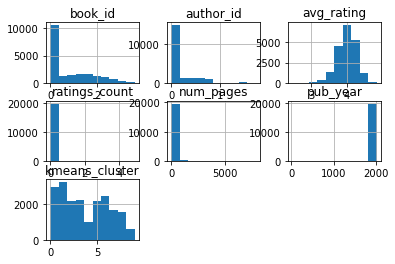

In [53]:
df_new.hist()

<AxesSubplot:>

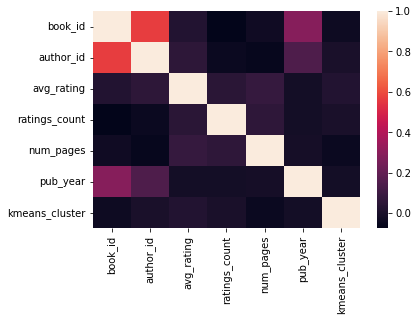

In [54]:
sns.heatmap(df_new.corr())

## Most Rated Books

/Users/maryamnozari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratings_count', ylabel='title'>

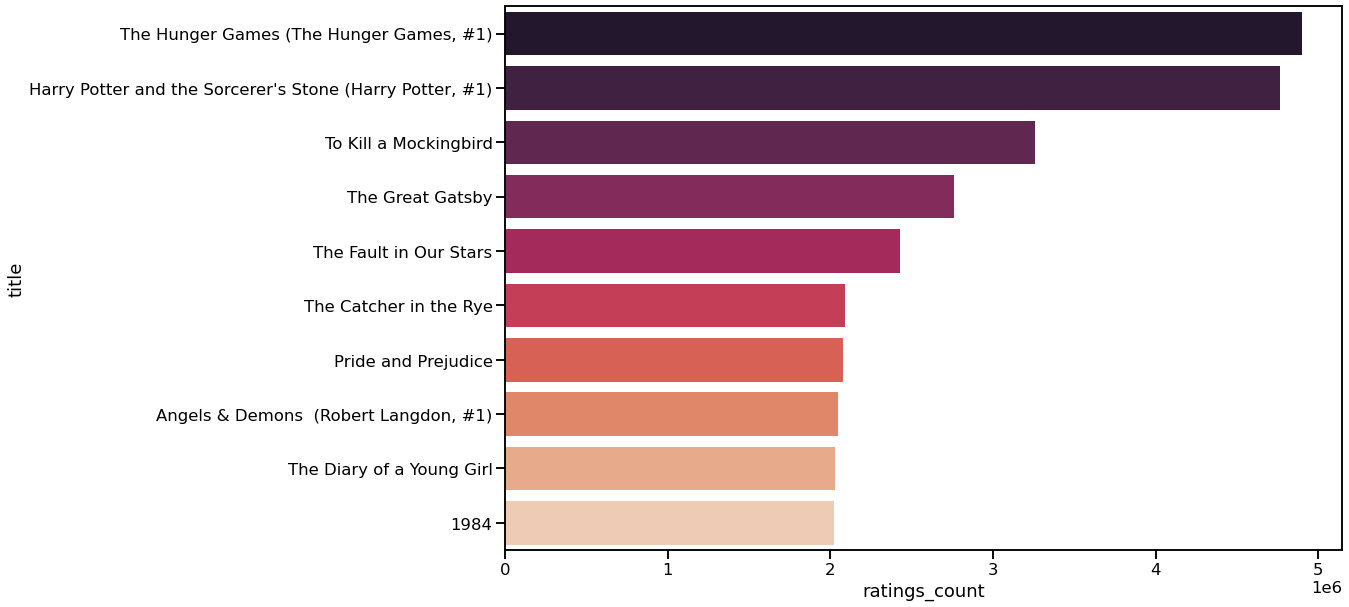

In [59]:
most_rated = df_new.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='rocket')

# Authors with Most books

/Users/maryamnozari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


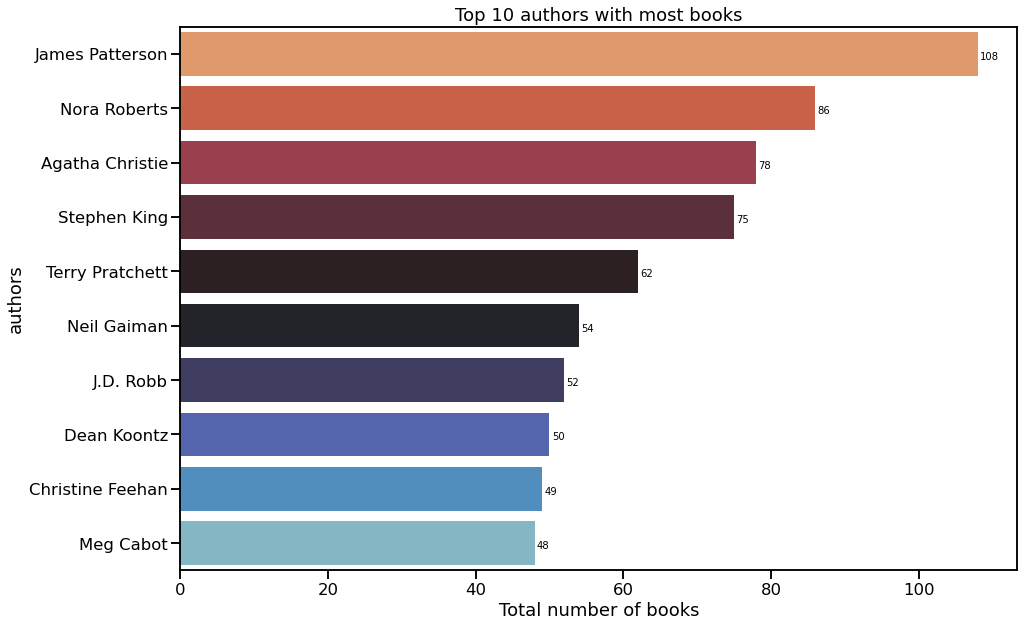

In [60]:

most_bks_author = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_bks_author['title'], most_bks_author.index, palette='icefire_r')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')


# Highly Rated Authors

In [61]:
high_rated_authors= df_new[df_new['avg_rating']>= 4.0]


In [62]:
high_rated_authors = high_rated_authors.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')

In [63]:
high_rated_authors

,title
authors,
J.D. Robb,52
Nora Roberts,51
Christine Feehan,49
James Patterson,42
Neil Gaiman,39
Terry Pratchett,39
Kristen Ashley,38
Sherrilyn Kenyon,37
Masashi Kishimoto,37


/Users/maryamnozari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


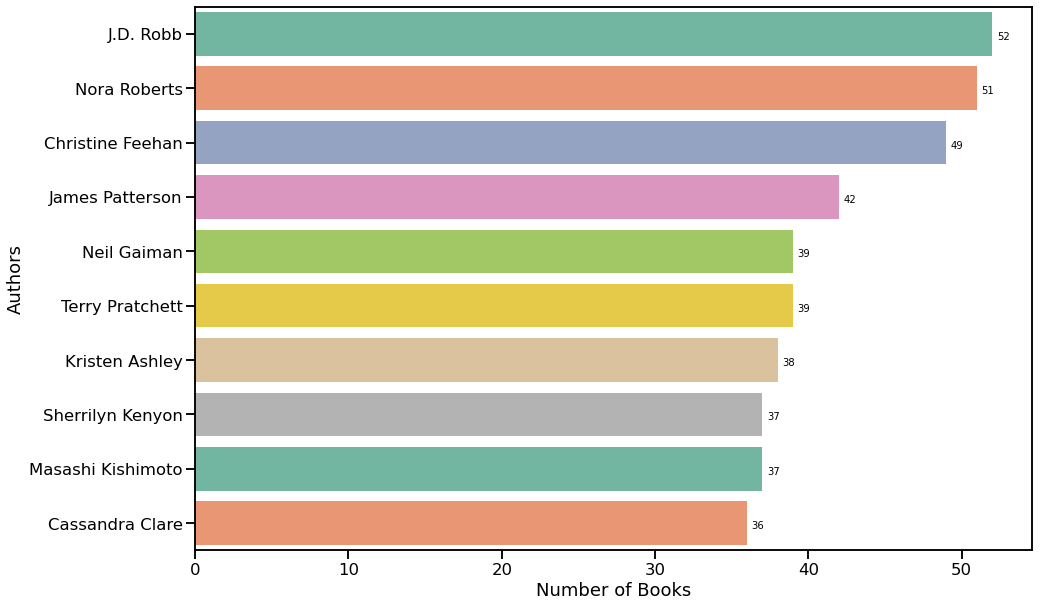

In [65]:
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_authors['title'], high_rated_authors.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

# Average Rating Plot

/Users/maryamnozari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_rating', ylabel='Density'>

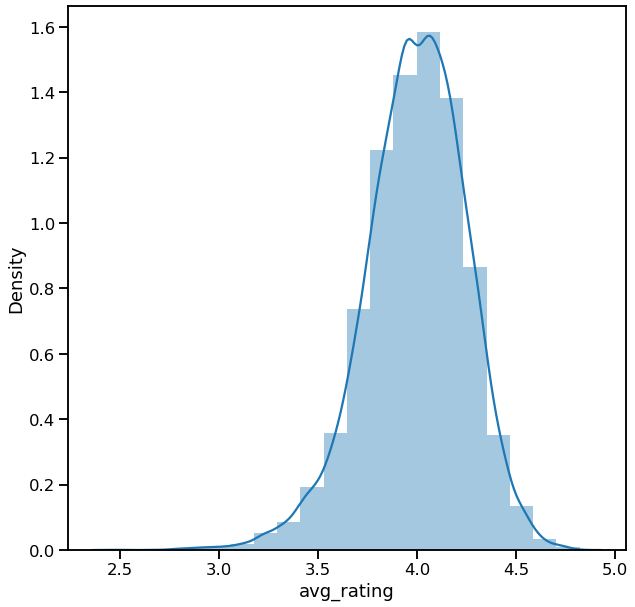

In [73]:
plt.figure(figsize=(10,10))
rating= df_new.avg_rating
sns.distplot(rating, bins=20)

## Correlation between Number of Pages and Ratings

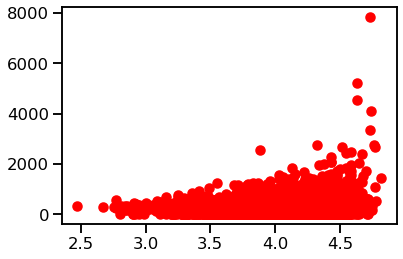

In [89]:
plt.scatter(x="avg_rating", y= "num_pages", data = df_new, c = 'r')
 
# To show the plot
plt.show()

<Figure size 1080x720 with 0 Axes>

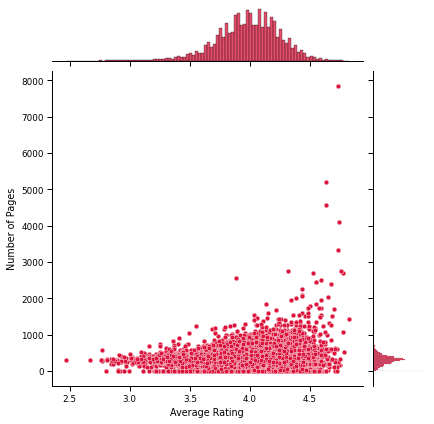

In [90]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="avg_rating", y= "num_pages", data = df_new, color = 'crimson')
ax.set_axis_labels("Average Rating", "Number of Pages")

<Figure size 1080x720 with 0 Axes>

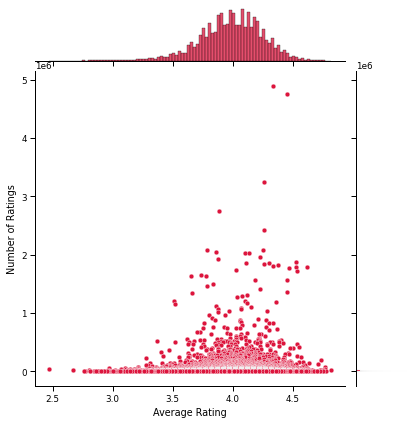

In [93]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="avg_rating", y= "ratings_count", data = df_new, color = 'crimson')
ax.set_axis_labels("Average Rating", "Number of Ratings")

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19907 entries, 0 to 19906
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_id         19907 non-null  int64  
 1   author_id       19907 non-null  int64  
 2   authors         19907 non-null  object 
 3   title           19907 non-null  object 
 4   description     19907 non-null  object 
 5   publisher       19907 non-null  object 
 6   genres          19907 non-null  object 
 7   avg_rating      19907 non-null  float64
 8   ratings_count   19907 non-null  int64  
 9   num_pages       19907 non-null  int64  
 10  pub_year        19907 non-null  float64
 11  similar_books   19907 non-null  object 
 12  url             19907 non-null  object 
 13  tokens          19907 non-null  object 
 14  kmeans_cluster  19907 non-null  int64  
 15  tsne_1          19907 non-null  float64
 16  tsne_2          19907 non-null  float64
dtypes: float64(4), int64(5), object